해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

해당 미션으로 시도해 볼 수 있는 현실 세계 문제

**이탈 예측 모델링**: 가장 일반적인 사용 사례로, 고객의 이탈 가능성을 예측하는 모델을 구축합니다. 이러한 모델은 고객의 과거 데이터와 행동 패턴을 분석하여 누가 이탈할 가능성이 높은지 예측합니다.

**고객 세분화**: 고객을 다양한 그룹으로 세분화하여, 특정 그룹이 왜 더 높은 이탈률을 보이는지 이해할 수 있습니다. 이를 통해 타겟 마케팅 전략을 개발하거나 특정 고객 그룹에 더 맞춤화된 서비스를 제공할 수 있습니다.

**원인 분석**: 머신러닝 모델을 사용하여 고객 이탈의 주요 원인을 파악할 수 있습니다. 예를 들어, 서비스 품질, 가격, 고객 서비스 경험 등 다양한 요인이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 피처의 중요도를 파악하고 어떤 요인이 이탈의 중요한 피처인지를 확인해 봅니다.

**추천 시스템 개선**: 이탈 위험이 있는 고객에게 맞춤형 서비스나 제품을 추천하여 고객 만족도를 높이고 이탈률을 줄일 수 있습니다.

**고객 유지 전략 개발**: 이탈 예측 모델을 활용해 고위험 고객을 식별하고, 이들을 대상으로 특별 프로모션, 개선된 고객 서비스, 맞춤형 커뮤니케이션 전략 등을 제공하여 이탈률을 줄일 수 있습니다.

**정책 및 서비스 개선**: 모델에서 도출된 인사이트를 바탕으로 비즈니스 정책, 제품, 서비스를 개선하여 전반적인 고객 경험을 향상시킬 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")

In [5]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# 결측치 처리

In [10]:
df.isnull().sum(axis=0).sum()

0

In [15]:
#.str.strip()을 통해 공백문자를 제거합니다.
# .replace("", np.nan) 는 공백문자를 결측치로 변경해 줍니다.
# float수치형태로 변환
df['TotalCharges'] = df['TotalCharges'].str.strip().replace("", np.nan).astype(float)

In [16]:
df['TotalCharges'].head(1)

customerID
7590-VHVEG    29.85
Name: TotalCharges, dtype: float64

In [18]:
df.isnull().sum()
#중간값, 평균값 등의 대푯값으로 채운다면 
# 인구통계학적인 정보, 구독정보 등을 참고해서 
# 해당 세그먼트에서의 대푯값으로 채우는 것을 추천합니다.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# 결측치 제거 
df = df.dropna()

# 바이너리 변수 인코딩
범주 값이 2개로 되어 있어 이진값으로 인코딩이 가능한 변수를 찾기

In [23]:
n_unique = df.nunique()

In [28]:
bi_cols = n_unique[n_unique==2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [29]:
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [59]:
#바이너리 변수 인코딩 -> 0/1로
df['gender_encode'] = (df['gender']=='Male').astype(int)
df['Partner_encode'] = (df['Partner']=='Yes').astype(int)
df['Dependents_encode'] = (df['Dependents']=='Yes').astype(int)
df['PhoneService_encode'] = (df['PhoneService']=='Yes').astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


# 정답 빈도수 확인

In [64]:
df['Churn'].value_counts(normalize = True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [65]:
df['Churn'].value_counts(1)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

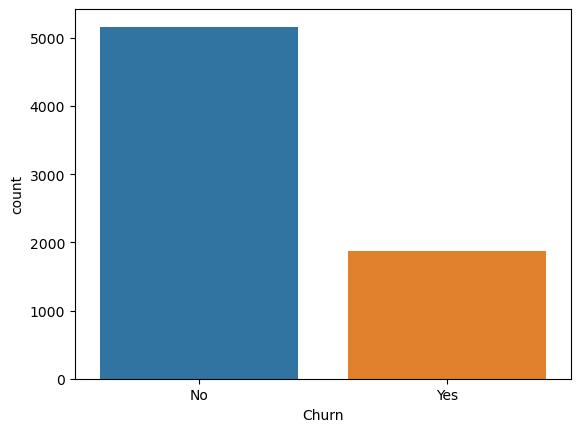

In [67]:
sns.countplot(data=df, x ='Churn')

# 미션 1) - 학습, 예측 데이터셋 나누기
* 간단하게 모델을 만들어보기 위해 수치 데이터만 사용
* 학습, 예측에 사용할 컬럼에 이름 지정  
X : feature  
y : label

In [71]:
#select_dtypes
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

In [72]:
#예측되어야할 정답 값
label_name = 'Churn'

In [74]:
X = df[feature_names]
y = df[label_name]

display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

((7032, 9), (7032,))

In [75]:
df.shape

(7032, 25)

In [79]:
split_count = int(df.shape[0]*0.8)
split_count

5625

In [84]:
X_train = X[:split_count].copy()
y_train = y[:split_count].copy()

In [85]:
X_test = X[split_count:].copy()
y_test = y[split_count:].copy()

print("* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.


((5625, 9), (1407, 9), (5625,), (1407,))

# 미션 2) - 머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

## 결정트리 
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.

* 머신러닝 모델의 성능을 개선하는 방법
    * 데이터 분할
    * 데이터 전처리, 결측치 처리
    * 피처 선택, 피처 엔지니어링(스케일링, 변환, 인코딩 등)
    * 모델의 `파라미터 값을 변경하는 방법`

In [86]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [87]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
y_predict = model.predict(X_test)
y_predict[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

# 미션 3) - 점수 측정하고 피처의 중요도 시각화 해주세요.

## 3-1) 트리 시각화 하기

In [106]:
from sklearn.tree import plot_tree

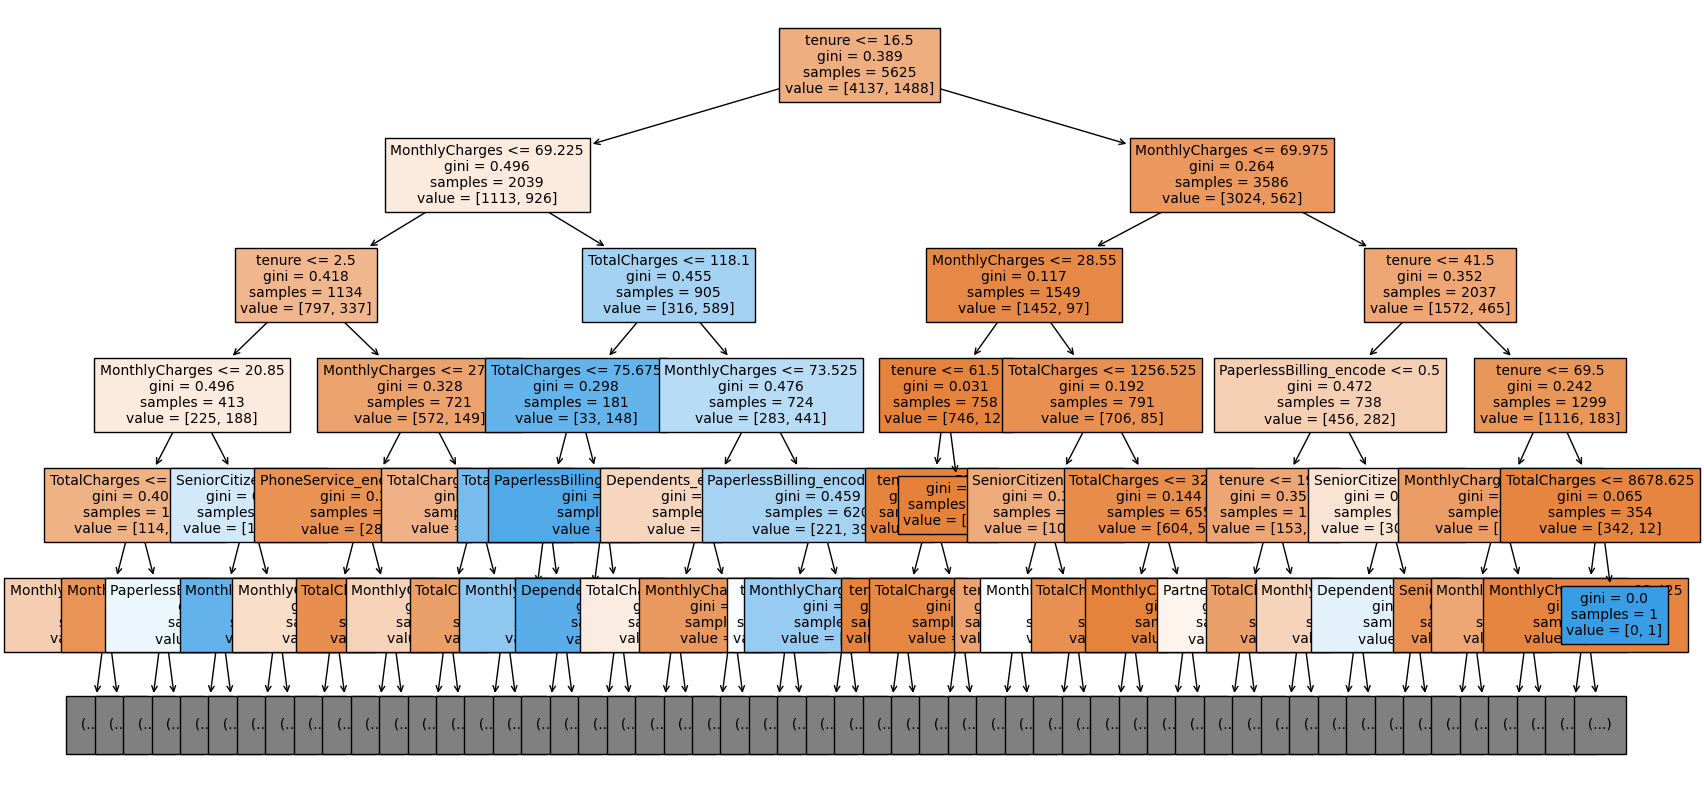

In [117]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feature_names,
         filled=True, max_depth = 5, fontsize=10)
plt.show()

In [125]:
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
text_tree =export_text(model, 
                      feature_names=feature_names,
                     max_depth=5)
print(text_tree)

|--- tenure <= 16.50
|   |--- MonthlyCharges <= 69.22
|   |   |--- tenure <= 2.50
|   |   |   |--- MonthlyCharges <= 20.85
|   |   |   |   |--- TotalCharges <= 20.27
|   |   |   |   |   |--- MonthlyCharges <= 19.27
|   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |--- MonthlyCharges >  19.27
|   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |--- TotalCharges >  20.27
|   |   |   |   |   |--- MonthlyCharges <= 20.48
|   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |--- MonthlyCharges >  20.48
|   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- MonthlyCharges >  20.85
|   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |--- PaperlessBilling_encode <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |--- PaperlessBilling_encode >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |--- SeniorCitizen >  0.50
|   |   |

## 3-2) 피처 중요도 시각화 하기

In [96]:
model.feature_importances_

array([0.02294805, 0.24326781, 0.35205166, 0.26937842, 0.02624418,
       0.02838156, 0.02544217, 0.00788948, 0.02439668])

<Axes: >

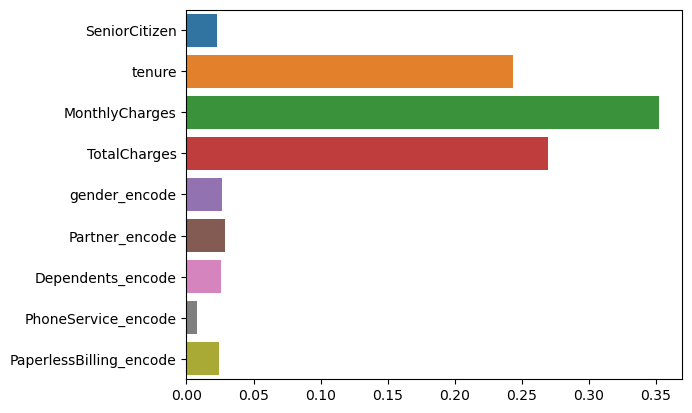

In [101]:
sns.barplot(y=feature_names, x=model.feature_importances_)

## 3-3) 정확도(Accuracy)구하기

In [102]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test, y_predict) * 100

73.0632551528074